<a href="https://colab.research.google.com/github/Singhsansar/Covid-Knowledge-Graph/blob/main/Data_processing_knowlegde_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading and Manipulaing Data**

In [ ]:
!wget https://github.com/Singhsansar/Covid-Knowledge-Graph/raw/main/news_data.csv


--2024-01-02 16:23:49--  https://github.com/Singhsansar/Covid-Knowledge-Graph/raw/main/news_data.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Singhsansar/Covid-Knowledge-Graph/main/news_data.csv [following]
--2024-01-02 16:23:50--  https://raw.githubusercontent.com/Singhsansar/Covid-Knowledge-Graph/main/news_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10474793 (10.0M) [text/plain]
Saving to: ‘news_data.csv’

news_data.csv       100%[===================>]   9.99M  --.-KB/s    in 0.1s    

2024-01-02 16:23:50 (103 MB/s) - ‘news_data.csv’ saved [10474793/10474793]



In [ ]:
import pandas as pd
df = pd.read_csv('news_data.csv')

In [ ]:
df.head()

,Date,Question,Title,Content,URL
0,NaN,Can pets catch the cold?,"Can dogs catch human colds? No, but they can g...","Pets - including dogs, cats, and birds - are i...",https://www.businessinsider.in/science/health/...
1,NaN,Is the Common Cold an Immune Overreaction?,‘Immune Distraction’ from Previous Colds Leads...,"At the beginning of the COVID pandemic, we wer...",https://www.urmc.rochester.edu/news/story/immu...
2,2023-10-30 00:00:00,Air purifier agains bacteria and viruses?,"Could a Cheap, DIY Air Filter Help Rid Your Ho...",By Dennis Thompson HealthDay Reporter\n\n(Heal...,https://www.usnews.com/news/health-news/articl...
3,NaN,Why are bats the source of dangerous coronavir...,COVID-19 and Bats,The details provided below are based on the be...,https://www.bats.org.uk/about-bats/bats-and-di...
4,NaN,How do bats survive their own coronaviruses?,Coronavirus: Cracking the secrets of how bats ...,Coronavirus: Cracking the secrets of how bats ...,https://www.bbc.com/news/science-environment-5...


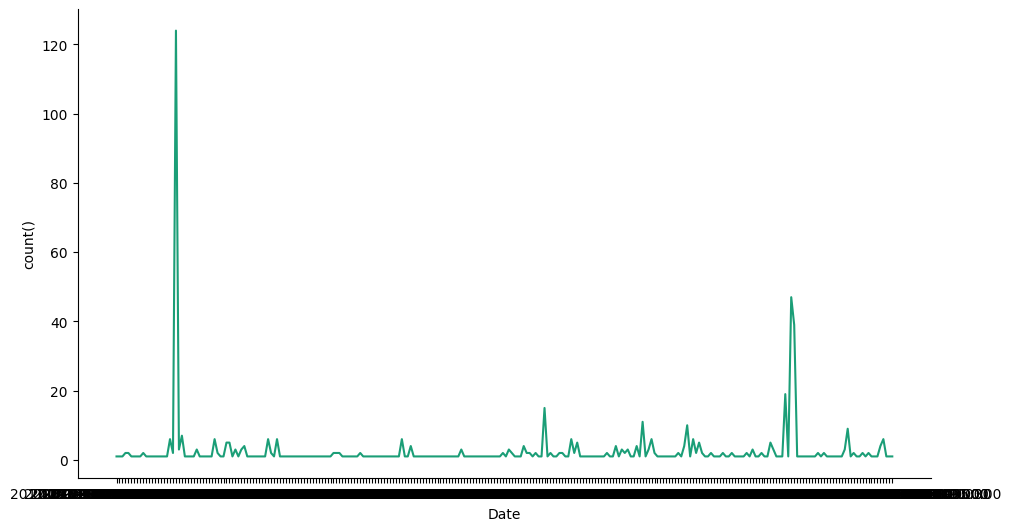

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [ ]:
data = df.iloc[:100]

In [ ]:
data.head()

,Date,Question,Title,Content,URL
0,NaN,Can pets catch the cold?,"Can dogs catch human colds? No, but they can g...","Pets - including dogs, cats, and birds - are i...",https://www.businessinsider.in/science/health/...
1,NaN,Is the Common Cold an Immune Overreaction?,‘Immune Distraction’ from Previous Colds Leads...,"At the beginning of the COVID pandemic, we wer...",https://www.urmc.rochester.edu/news/story/immu...
2,2023-10-30 00:00:00,Air purifier agains bacteria and viruses?,"Could a Cheap, DIY Air Filter Help Rid Your Ho...",By Dennis Thompson HealthDay Reporter\n\n(Heal...,https://www.usnews.com/news/health-news/articl...
3,NaN,Why are bats the source of dangerous coronavir...,COVID-19 and Bats,The details provided below are based on the be...,https://www.bats.org.uk/about-bats/bats-and-di...
4,NaN,How do bats survive their own coronaviruses?,Coronavirus: Cracking the secrets of how bats ...,Coronavirus: Cracking the secrets of how bats ...,https://www.bbc.com/news/science-environment-5...


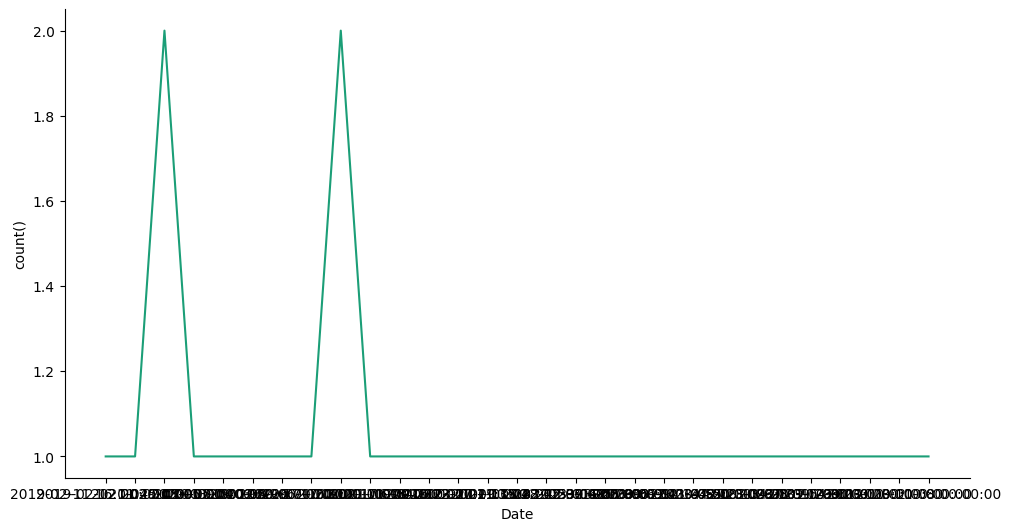

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

# **Data Cleaning**

In [48]:
import pandas as pd
from bs4 import BeautifulSoup
import re

texts = data['Content'].tolist()
cleaned_texts = []

for text in texts:
    soup = BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text(separator=' ')
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_text)
    error_patterns = ['access denied', 'temporarily blocked']
    if not any(pattern in cleaned_text.lower() for pattern in error_patterns):
        cleaned_texts.append(cleaned_text)

cleaned_df = data[data['Content'].apply(lambda x: not any(pattern in x.lower() for pattern in error_patterns))].copy()
cleaned_df['Cleaned_Content'] = cleaned_texts
cleaned_df.head(10)

,Date,Question,Title,Content,URL,Cleaned_Content
0,,Can pets catch the cold?,"Can dogs catch human colds? No, but they can g...","Pets - including dogs, cats, and birds - are i...",https://www.businessinsider.in/science/health/...,Pets including dogs cats and birds are immun...
1,,Is the Common Cold an Immune Overreaction?,‘Immune Distraction’ from Previous Colds Leads...,"At the beginning of the COVID pandemic, we wer...",https://www.urmc.rochester.edu/news/story/immu...,At the beginning of the COVID pandemic we were...
2,2023-10-30 00:00:00,Air purifier agains bacteria and viruses?,"Could a Cheap, DIY Air Filter Help Rid Your Ho...",By Dennis Thompson HealthDay Reporter\n\n(Heal...,https://www.usnews.com/news/health-news/articl...,By Dennis Thompson HealthDay Reporter\n\nHealt...
3,,Why are bats the source of dangerous coronavir...,COVID-19 and Bats,The details provided below are based on the be...,https://www.bats.org.uk/about-bats/bats-and-di...,The details provided below are based on the be...
4,,How do bats survive their own coronaviruses?,Coronavirus: Cracking the secrets of how bats ...,Coronavirus: Cracking the secrets of how bats ...,https://www.bbc.com/news/science-environment-5...,Coronavirus Cracking the secrets of how bats s...
5,,Can Coronaviridae mutate into something as dan...,Can Coronaviridae mutate into something as dan...,$\begingroup$\n\n'Dangerous' is quite a subjec...,https://biology.stackexchange.com/questions/89...,begingroup\n\nDangerous is quite a subjective ...
6,,Evolution history of virus tracing,Are You New Here? Tracing the Origin of Viruses,An interdisciplinary research team is probing ...,https://newscenter.sdsu.edu/sdsu_newscenter/ne...,An interdisciplinary research team is probing ...
7,,"Coronavirus origin could be bat, why this happ...","WHO, China Report Suggests COVID-19 Passed Fro...",A to-be-published joint study from the World H...,https://www.contagionlive.com/view/who-china-r...,A tobepublished joint study from the World Hea...
8,,How exactly does alcohol solution kill or neut...,Does alcohol kill viruses? How it works and wa...,"Alcohol-based cleansers can kill some viruses,...",https://www.medicalnewstoday.com/articles/does...,Alcoholbased cleansers can kill some viruses b...
10,,Why would a 2019-nCoV protein sequence in the ...,Why would a 2019-nCoV protein sequence in the ...,$\begingroup$\n\nThere seems to be a bit of a ...,https://biology.stackexchange.com/questions/90...,begingroup\n\nThere seems to be a bit of a con...


In [58]:
import pandas as pd
data['Date'] = data['Date'].fillna('')
data.head()


,Date,Question,Title,Content,URL
0,,Can pets catch the cold?,"Can dogs catch human colds? No, but they can g...","Pets - including dogs, cats, and birds - are i...",https://www.businessinsider.in/science/health/...
1,,Is the Common Cold an Immune Overreaction?,‘Immune Distraction’ from Previous Colds Leads...,"At the beginning of the COVID pandemic, we wer...",https://www.urmc.rochester.edu/news/story/immu...
2,2023-10-30 00:00:00,Air purifier agains bacteria and viruses?,"Could a Cheap, DIY Air Filter Help Rid Your Ho...",By Dennis Thompson HealthDay Reporter\n\n(Heal...,https://www.usnews.com/news/health-news/articl...
3,,Why are bats the source of dangerous coronavir...,COVID-19 and Bats,The details provided below are based on the be...,https://www.bats.org.uk/about-bats/bats-and-di...
4,,How do bats survive their own coronaviruses?,Coronavirus: Cracking the secrets of how bats ...,Coronavirus: Cracking the secrets of how bats ...,https://www.bbc.com/news/science-environment-5...


# **Named Entity Recongisation**

In [ ]:
import spacy
import pandas as pd
from spacy.matcher import Matcher
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [53]:
#removind the stopwords form the single test , later make a function and use it for the entire corpus
text = """
Pets - including dogs, cats, and birds - are immune to human viruses that cause the cold. Pets can have colds of their own like kennel cough, dog flu, and upper respiratory infections.
However, if you have the flu, you can transfer it to your pet. Advertisement Got the sniffles? It's still OK to snuggle with your pet on the couch as you get better. Because unlike friends and family,
your pet cannot catch your cold. However, make sure you have the cold and not the flu, because your pet can catch the flu from you. Here's what you need to know about the common cold, your pet, and you.
No, your pet can't catch your cold Lori Teller, a veterinarian and clinical associate professor at Texas A&M University, tells Insider that the estimated 200 or so viruses that cause the common cold are not contagious to companion animals,
including dogs, cats, birds, reptiles, amphibians, and fish. That's because the viruses that cause the common cold in people are species-specific. In other words, in the case of the cold, they can infect only humans.
How it works is that a virus is like a key that only fits into the right lock, called a receptor. It must bind to that receptor on the outside of a cell to gain entry and unleash an infection. Those locks, those receptors, generally vary from one species to the next, according to Gregory Gray,
an infectious-disease epidemiologist and professor at Duke University. Advertisement That means certain species may lack the receptor that a particular virus needs to gain entry, which halts infection before it can begin. Such is the case for your cold virus and your pet.
That said, "there are lots of diseases that are potentially transmissible between humans and animals - too many to count," Teller says. For example, the H1N1 flu pandemic of 2009-10 jumped from swine to humans and then to cats. Moreover,
diseases that are not from viruses, such as those caused by parasites, fungi, or bacteria, can also spread from animals to humans. Dogs and cats have their own version of the cold While pets are safe from the common cold that infects humans,
they can have colds of their own. In dogs, for example, there's dog flu and kennel cough. The symptoms of dog flu are similar to what's seen in people, including, coughing, sneezing, a runny nose, and fever.
"Kennel cough in dogs is recognized by a classic loud honking cough," says Kate KuKanich, a veterinarian and associate professor of internal medicine at Kansas State University. In cats, upper respiratory infections are most commonly caused by herpes virus,
calicivirus, Bordetella, mycoplasma, and Chlamydophila, KuKanich says. Advertisement "Cats with upper respiratory disease often have sneezing and nasal discharge and might have a fever and decreased appetite too."
What to do if your pet is sick "While dogs and cats are showing clinical signs of respiratory illness, it is very important to keep them home and isolated from other pets to minimize spread of disease,"
KuKanich says. "Just as we recommend sick people with colds or the flu stay home, we also don't want sick pets going for walks to the dog park or visiting friends at doggy daycare."
Teller assured that neither kennel cough in dogs nor upper respiratory infection in cats is contagious to humans. Also, there are no reports of a person catching the dog flu. Insider's takeaway Dogs,
and other pets, can't get human colds but they are still susceptible to cold-like infections including dog flu and kennel cough. It's important that if your pet is sick, you keep them isolated from other animals since dogs can infect other dogs.
If you think your dog is sick with kennel cough or another infection, it's important you take them to a vet. Call ahead of time so your vet can help you isolate them from the other animals there.
"""
stop_words = set(stopwords.words('english'))
words = word_tokenize(text)
filtered_text = [word for word in words if word.lower() not in stop_words]
filtered_text = ' '.join(filtered_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [54]:
print(filtered_text)

Pets - including dogs , cats , birds - immune human viruses cause cold . Pets colds like kennel cough , dog flu , upper respiratory infections . However , flu , transfer pet . Advertisement Got sniffles ? 's still OK snuggle pet couch get better . unlike friends family , pet catch cold . However , make sure cold flu , pet catch flu . 's need know common cold , pet , . , pet ca n't catch cold Lori Teller , veterinarian clinical associate professor Texas & University , tells Insider estimated 200 viruses cause common cold contagious companion animals , including dogs , cats , birds , reptiles , amphibians , fish . 's viruses cause common cold people species-specific . words , case cold , infect humans . works virus like key fits right lock , called receptor . must bind receptor outside cell gain entry unleash infection . locks , receptors , generally vary one species next , according Gregory Gray , infectious-disease epidemiologist professor Duke University . Advertisement means certain 

In [57]:
import spacy
from spacy.matcher import Matcher

# Given text
text = """
Pets - including dogs, cats, and birds - are immune to human viruses that cause the cold. Pets can have colds of their own like kennel cough, dog flu, and upper respiratory infections.
However, if you have the flu, you can transfer it to your pet. Advertisement Got the sniffles? It's still OK to snuggle with your pet on the couch as you get better. Because unlike friends and family,
your pet cannot catch your cold. However, make sure you have the cold and not the flu because your pet can catch the flu from you. Here's what you need to know about the common cold, your pet, and you.
No, your pet can't catch your cold Lori Teller, a veterinarian and clinical associate professor at Texas A&M University, tells Insider that the estimated 200 or so viruses that cause the common cold are not contagious to companion animals,
including dogs, cats, birds, reptiles, amphibians, and fish. That's because the viruses that cause the common cold in people are species-specific. In other words, in the case of the cold, they can infect only humans.
How it works is that a virus is like a key that only fits into the right lock, called a receptor. It must bind to that receptor on the outside of a cell to gain entry and unleash an infection. Those locks, those receptors, generally vary from one species to the next, according to Gregory Gray,
an infectious-disease epidemiologist and professor at Duke University. Advertisement That means certain species may lack the receptor that a particular virus needs to gain entry, which halts infection before it can begin. Such is the case for your cold virus and your pet.
That said, "there are lots of diseases that are potentially transmissible between humans and animals - too many to count," Teller says. For example, the H1N1 flu pandemic of 2009-10 jumped from swine to humans and then to cats. Moreover,
diseases that are not from viruses, such as those caused by parasites, fungi, or bacteria, can also spread from animals to humans. Dogs and cats have their own version of the cold While pets are safe from the common cold that infects humans,
they can have colds of their own. In dogs, for example, there's dog flu and kennel cough. The symptoms of dog flu are similar to what's seen in people, including, coughing, sneezing, a runny nose, and fever.
"Kennel cough in dogs is recognized by a classic loud honking cough," says Kate KuKanich, a veterinarian and associate professor of internal medicine at Kansas State University. In cats, upper respiratory infections are most commonly caused by herpes virus,
calicivirus, Bordetella, mycoplasma, and Chlamydophila, KuKanich says. Advertisement "Cats with upper respiratory disease often have sneezing and nasal discharge and might have a fever and decreased appetite too."
What to do if your pet is sick "While dogs and cats are showing clinical signs of respiratory illness, it is very important to keep them home and isolated from other pets to minimize spread of disease,"
KuKanich says. "Just as we recommend sick people with colds or the flu stay home, we also don't want sick pets going for walks to the dog park or visiting friends at doggy daycare."
Teller assured that neither kennel cough in dogs nor upper respiratory infection in cats is contagious to humans. Also, there are no reports of a person catching the dog flu. Insider's takeaway Dogs,
and other pets, can't get human colds but they are still susceptible to cold-like infections including dog flu and kennel cough. It's important that if your pet is sick, you keep them isolated from other animals since dogs can infect other dogs.
If you think your dog is sick with kennel cough or another infection, it's important you take them to a vet. Call ahead of time so your vet can help you isolate them from the other animals there.
"""
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
matcher = Matcher(nlp.vocab)
entity_pattern = [{"LOWER": "dog"}, {"POS": "NOUN", "OP": "*"}, {"LOWER": "flu"}]
matcher.add("ENTITY_PATTERN", [entity_pattern])

# Find matches in the processed text
matches = matcher(doc)
entities = set()
relationships = set()

for match_id, start, end in matches:
    entity = doc[start:end].text.lower()
    entities.add(entity)
    relationships.add("gets")

# Display the entities and relationships
print("Entities:", entities)
print("Relationships:", relationships)


Entities: {'dog flu'}
Relationships: {'gets'}


# **Data Processing**

Knowledge Graphs

Gen AI, LLMs

Graph DBs - Neo4j

Fine Tune LLMs

Graph ML

Node Embeddings

Graph Features

Langchain, chatbots


In [ ]:
!pip install py2neo

In [ ]:
# %matplotlib inline
# import json
# import re
# import urllib
# from pprint import pprint
# import time
# from tqdm import tqdm
# from py2neo import Node, Graph, Relationship, NodeMatcher
# from py2neo.bulk import merge_nodes
# import numpy as np
# import pandas as pd
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.metrics import ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns


In [ ]:
# #using the neo4j for the graph construction
# uri = 'bolt://44.199.192.90:7687'
# user= 'neo4j'
# pwd = 'soap-merchant-visibilities'
# graph = Graph(uri, auth=(user,pwd))
# nodes_matcher = NodeMatcher(Graph)

In [ ]:
!pip install gradio